In [1]:
import pandas as pd


In [9]:
import logging
# Step 1: Create a logger object
logger = logging.getLogger('my_logger')

# Step 2: Set the logging level
logger.setLevel(logging.DEBUG)

In [3]:
def parse(file_name="input/random-n2048-d16-c16.txt"):
  
  lns = []
  with open(file_name) as fl:
    n = 0
    for ln in fl:
      n += 1
      if n==1: continue
      lns.append([float(i) for i in ln.split()[1:]])
  return lns


In [4]:
pts = parse()


In [10]:
logger.info(len(pts))
logger.info( "First point = {}".format(pts[0]) )

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [40]:
# Create KMeans instance
kmeans = KMeans(n_clusters=16, random_state=0)

X = np.array(pts)
# Sample data


# Fit the model
kmeans.fit(X)

# Predict the clusters
labels = kmeans.predict(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Print results
#print("Cluster labels:", labels)
#print("Centroids:", centroids)



In [41]:
print(len(X[:,0]))

2048


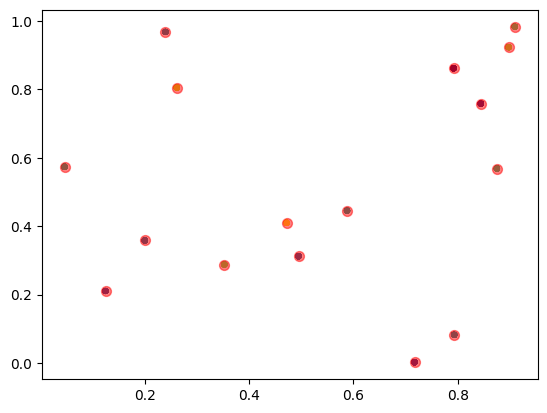

In [42]:
# Plot the data and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.5)
plt.show()

In [61]:
def readLabels(input_file="output/2048.txt"):
  labels = []
  with open(input_file) as fl:
    for ln in fl:
      labels.append(int(ln))
  return labels

def readCentroids(input_file="output/2048.centroids.txt"):
  pts = []
  with open(input_file) as fl:
    for ln in fl:
      pts.append([float(i) for i in ln.split()])
  return pts 

In [70]:

lbls = readLabels()
cnts = np.array(readCentroids())

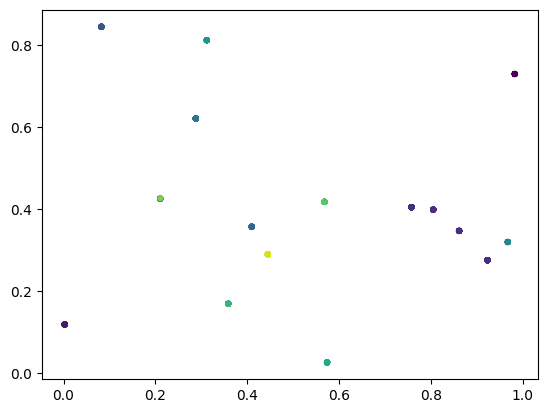

In [71]:
# Plot the data and centroids
plt.scatter(X[:, 1], X[:, 5], c=lbls, s=10, cmap='viridis')
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.5)
plt.show()

In [74]:
print(cnts)

[[0.909752   0.982782   0.810177   0.902189   0.310136   0.72985
  0.898835   0.683984   0.472191   0.100688   0.434165   0.610875
  0.913039   0.966598   0.477037   0.865304  ]
 [0.717297   0.00232745 0.822719   0.528355   0.0977498  0.118904
  0.64926    0.873644   0.280014   0.978514   0.100196   0.853935
  0.396682   0.0813351  0.274706   0.45296   ]
 [0.713511   0.835628   0.400589   0.306454   0.641402   0.357152
  0.823213   0.508183   0.347944   0.419231   0.848084   0.479065
  0.510245   0.807501   0.691972   0.42417   ]
 [0.123918   0.210499   0.80073    0.936948   0.0227614  0.425533
  0.101474   0.25985    0.220632   0.64703    0.350229   0.180291
  0.503632   0.0393817  0.100989   0.988258  ]
 [0.793306   0.082352   0.612814   0.486478   0.630147   0.845081
  0.243053   0.731475   0.117134   0.220451   0.794618   0.332539
  0.81591    0.10061    0.146324   0.69767   ]
 [0.471655   0.409926   0.569135   0.508624   0.311439   0.357168
  0.837678   0.250908   0.560581   0.012

In [75]:
print(centroids)

[[0.79233167 0.86137129 0.13340653 0.52085186 0.65079881 0.34706439
  0.87186022 0.27839268 0.01856025 0.04065448 0.68098875 0.55834454
  0.94652708 0.93842072 0.90983568 0.04201295]
 [0.84444675 0.75790401 0.420523   0.25891946 0.51129641 0.40493135
  0.78380042 0.30333747 0.47665311 0.58336878 0.90812527 0.50468086
  0.28182952 0.7558102  0.61840327 0.25054267]
 [0.71729694 0.00232745 0.8227189  0.52835468 0.09774984 0.11890387
  0.64926012 0.87364449 0.28001409 0.97851441 0.10019645 0.85393478
  0.39668192 0.08133508 0.27470634 0.4529602 ]
 [0.12388323 0.21055108 0.80071204 0.93695485 0.02278325 0.42561407
  0.10149992 0.25990443 0.22084198 0.64693493 0.35025043 0.18033807
  0.50362029 0.03938177 0.1009487  0.98822859]
 [0.49461185 0.31205256 0.46691195 0.8090563  0.87502828 0.81242432
  0.18799413 0.9994025  0.63308589 0.08344504 0.72556649 0.98678839
  0.40182058 0.67849317 0.31619191 0.21353889]
 [0.19935791 0.35855797 0.7316251  0.83829535 0.9184932  0.16941221
  0.67258587 0.96

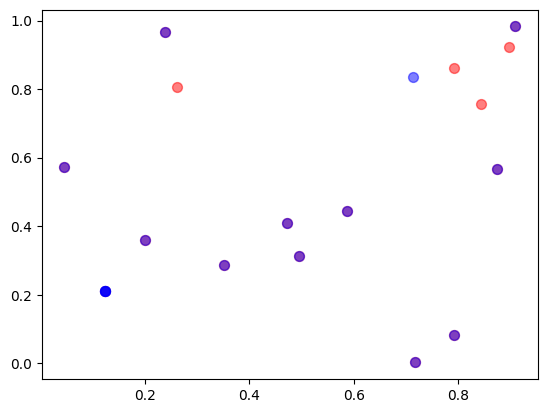

In [69]:
# Plot the data and centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.5)
plt.scatter(cnts[:, 0], cnts[:, 1], c='blue', s=50, alpha=0.5)
plt.show()